In [2]:
# Days to start and end on. Note that '2' (Feb.) needs leap-year adjusting for its end date!
dates = {'1': (1, 31), '2': (1, 28), '3': (1, 31),
         '4': (1, 30), '5': (1, 31), '6': (1, 30),
         '7': (1, 31), '8': (1, 31), '9': (1, 30),
         '10': (1, 31), '11': (1, 30), '12': (1, 31)}
years = [year for year in range(2011, 2021)]

In [3]:
monthly_start = []

for idx, col in dates.items():
    format_date = ''
    format_date = format_date + str(idx).zfill(2)
    format_date = format_date + str(col[0]).zfill(2)
    monthly_start.append(format_date)

monthly_start[:5]

['0101', '0201', '0301', '0401', '0501']

In [4]:
start_dates = []
for year in years:
    for start in monthly_start:
        format_date = str(year) + str(start)
        start_dates.append(format_date)

In [5]:
start_dates[:5]

['20110101', '20110201', '20110301', '20110401', '20110501']

In [6]:
monthly_end = []

for idx, col in dates.items():
    format_date = ''
    format_date = format_date + str(idx).zfill(2)
    format_date = format_date + str(col[1]).zfill(2)
    monthly_end.append(format_date)

monthly_end[:5]

['0131', '0228', '0331', '0430', '0531']

In [7]:
end_dates = []
for year in years:
    for end in monthly_end:
        if year % 4 == 0:
            end = end.replace('0228', '0229')
        format_date = str(year) + str(end)
        end_dates.append(format_date)

In [8]:
end_dates[:5]

['20110131', '20110228', '20110331', '20110430', '20110531']

In [9]:
start_dates[0]

'20110101'

In [ ]:
from tqdm import tqdm
import pandas as pd
import function_library as fl

location = fl.get_icao('texas', 'houston')

omega = []

for idx in tqdm(range(len(start_dates))):
    gen_month = fl.generate_month(location, start_dates[idx], end_dates[idx])
    frm_month = fl.format_month(gen_month)
    omega.append(frm_month)

In [17]:
df = fl.quick_group(pd.concat(omega)).max()
df

pressure  temp  feels_like
obs_name        year month day                            
Houston/Intcntl 2010 12    31      29.75  60.0        60.0
                2011 01    01      30.19  64.0        64.0
                           02      30.31  57.0        57.0
                           03      30.18  61.0        61.0
                           04      30.04  67.0        67.0
...                                  ...   ...         ...
                2020 12    27      29.99  72.0        72.0
                           28      30.11  76.0        76.0
                           29      30.08  73.0        73.0
                           30      29.85  76.0        76.0
                           31      29.67  69.0        69.0

[3408 rows x 3 columns]

In [18]:
# To standardize the charts
df['temp'][0] = 0
df['temp'][-1] = 115

In [19]:
df.describe()

,pressure,temp,feels_like
count,3408.000000,3408.000000,3408.000000
mean,29.979123,79.948357,82.867371
std,0.164869,13.365808,16.337288
min,29.520000,0.000000,27.000000
25%,29.870000,72.000000,72.000000
50%,29.950000,82.000000,83.000000
75%,30.070000,91.000000,97.250000
max,30.660000,115.000000,119.000000


In [30]:
city_ = df.index[0][0]
city_

'Houston/Intcntl'

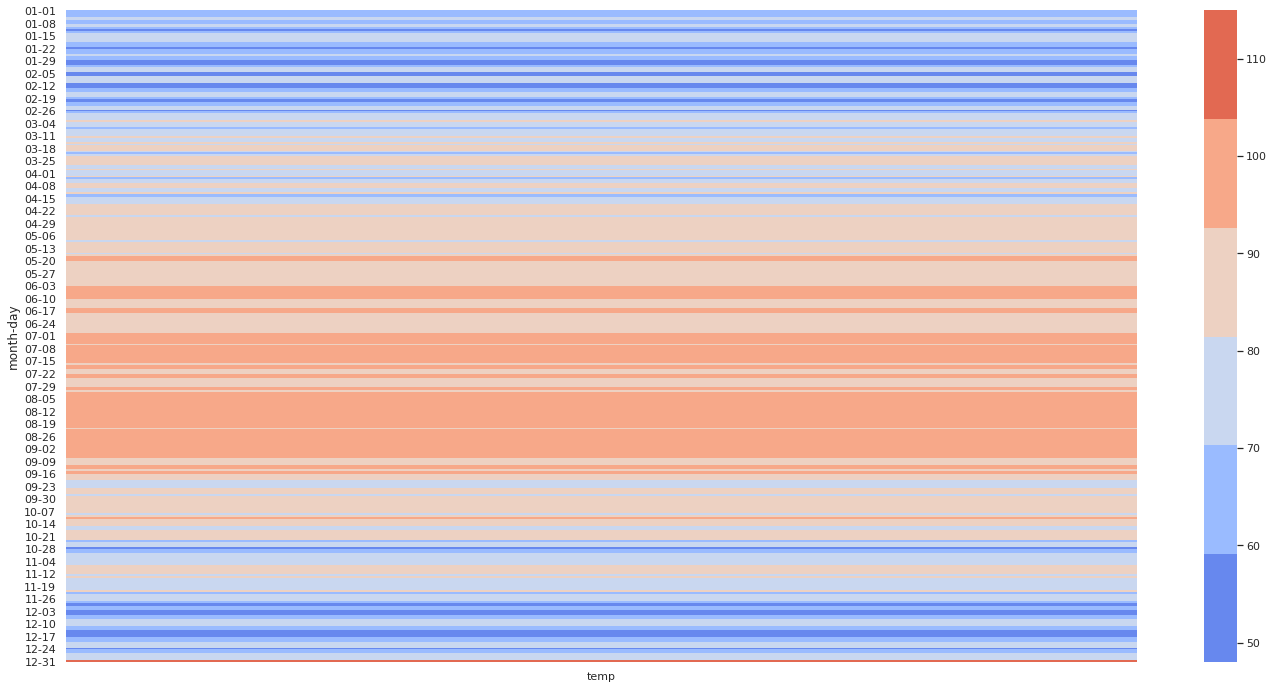

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

colormap = sns.color_palette('coolwarm')

fig, ax = plt.subplots(figsize = (24, 12))
sns.heatmap(data = df.loc[(city_, '2020')][['temp']], cmap = colormap);
plt.show()